In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from reinforce import PolicyGradientAgent

In [2]:
def plot_learning_curve(scores, x):
    running_avg = np.zeros(len(scores))
    for i in range(len(running_avg)):
        running_avg[i] = np.mean(scores[max(0, i-100):(i+1)])
    plt.plot(x, running_avg)
    plt.title('Running average of previous 100 scores')

In [3]:
if __name__ == '__main__':
    env = gym.make('CartPole-v0')
    n_games = 3001
    agent = PolicyGradientAgent(gamma=0.99, lr=0.0005, input_dims=(env.observation_space.shape),
                                n_actions=env.action_space.n, fc1_dims=128, fc2_dims=128)

    scores = []
    for i in range(n_games):
        done = False
        observation = env.reset()
        score = 0
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.store_rewards(reward)
            observation = observation_
        agent.learn()
        scores.append(score)

        avg_score = np.mean(scores[-100:])
        print('episode ', i, 'score %.2f' % score,
                'average score %.2f' % avg_score)

episode  0 score 25.00 average score 25.00
episode  1 score 17.00 average score 21.00
episode  2 score 18.00 average score 20.00
episode  3 score 25.00 average score 21.25
episode  4 score 25.00 average score 22.00
episode  5 score 14.00 average score 20.67
episode  6 score 17.00 average score 20.14
episode  7 score 61.00 average score 25.25
episode  8 score 18.00 average score 24.44
episode  9 score 19.00 average score 23.90
episode  10 score 57.00 average score 26.91
episode  11 score 98.00 average score 32.83
episode  12 score 23.00 average score 32.08
episode  13 score 45.00 average score 33.00
episode  14 score 54.00 average score 34.40
episode  15 score 27.00 average score 33.94
episode  16 score 17.00 average score 32.94
episode  17 score 76.00 average score 35.33
episode  18 score 50.00 average score 36.11
episode  19 score 26.00 average score 35.60
episode  20 score 32.00 average score 35.43
episode  21 score 37.00 average score 35.50
episode  22 score 19.00 average score 34.7

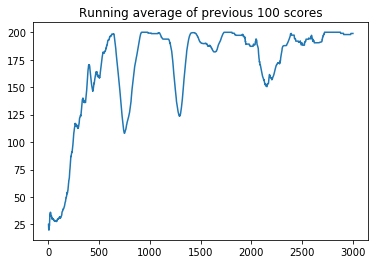

In [4]:
x = [i+1 for i in range(len(scores))]
plot_learning_curve(scores, x)